# Decriminalization of drugs
Portugal and Oregon stand out as two regions that have implemented distinct decriminalization policies. Portugal's journey began in 2001 with the decriminalization of all drugs, a pioneering move aimed at reframing drug use as a public health issue rather than a criminal one. This policy was driven by a severe public health crisis characterized by high rates of drug-related deaths and HIV infections among drug users (Ashton, 2019). Under this policy, individuals caught with small quantities of drugs are not prosecuted but referred to "dissuasion commissions," which assess their needs and recommend treatment, fines, or social services. This approach focuses more on rehabilitation and harm reduction rather than punishment (Félix et al., 2017).
<br>
<br>
In contrast with Portugal, Oregon’s policy, implemented in 2021, only decriminalizes the possession of small amounts of certain drugs, including heroin, cocaine, and methamphetamine. Rather than facing arrest and jail time, individuals in Oregon caught with these substances receive a civil citation and a fine, which can be waived if they seek an assessment for substance use disorder. Oregon's approach is more focused on reducing incarceration rates and reallocating funds from law enforcement to addiction treatment and harm reduction services (Gerstner, 2021).
<br>
<br>
To understand the impact of these policies, we analyzed a range of data from both regions, including drug-related deaths, drug-related crime statistics, and public health expenditures. By comparing these metrics before and after decriminalization, we draw insights into the efficacy and challenges of each approach.

## Perspective 1 - Drugs should be decriminalized to stop drug criminalization

### Decriminalization reduces drug-related crime

In [41]:
# ! pip3 install dash
# ! pip install dash

# import pandas as pd
# import numpy as np
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.graph_objs as go
# import plotly.express as px

# # makeing a dataframe with the data of two separate datasets of the amount of crimes per country, per year. 
# # Most values align, but some are missing in one dataset and not in the other
# # To make the dataframe as complete as possible, we'll combine the two datasets

# crimes_1 = pd.read_csv("DLOs_europe_1.csv")
# crimes_2 = pd.read_csv("DLOs_europe_2.csv")

# crimes_df1 = pd.DataFrame(crimes_1)
# crimes_df2 = pd.DataFrame(crimes_2)

# years = ['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007']

# # Function to compare values from the two dataframes and return a combined value
# def compare_values(self_value, other_value):

#     # if both are Nan, keep Nan in the dataset
#     if pd.isna(self_value) and pd.isna(other_value):
#         return np.nan

#     # if one value is NaN, keep the value of the other dataset
#     elif pd.isna(self_value):
#         return other_value
#     elif pd.isna(other_value):
#         return self_value
    
#     # if values are the same
#     elif self_value == other_value:
#         return self_value

#     # if values are different, keep the mean
#     else:
#         return (self_value + other_value) / 2

# # Create a new dictionary to store the combined data from the two dataframes
# combined_crimes = {'Country': crimes_df1['Country']}

# # Loop through each year to process the data for that year
# for year in years:

#     # Check if the year exists in both dataframes
#     if year in crimes_df1.columns and year in crimes_df2.columns:
        
#         # For each row, apply a the compare_values() function to compare and combine the values from both dataframes
#         combined_crimes[year] = crimes_df1.apply(
#             lambda row: compare_values(

#                 # Value from the first dataframe
#                 row[year], 

#                 # Corresponding value from the second dataframe
#                 crimes_df2.loc[crimes_df2['Country'] == row['Country'], year].values[0]

#                 # Use np.nan if the country is not in the second dataframe
#                 if row['Country'] in crimes_df2['Country'].values else np.nan 

#             ), axis=1
#         )
        
#     # If the year exists only in the first dataframe, use those values
#     elif year in crimes_df1.columns:
#         combined_crimes[year] = crimes_df1[year]

#     # Same for the second dataframe
#     elif year in crimes_df2.columns:
#         combined_crimes[year] = crimes_df2[year]

#     # If the year exists in neither dataframe, use np.nan
#     else:
#         combined_crimes[year] = np.nan

# # Convert the dictionary to a DataFrame
# crimes_combined_df = pd.DataFrame(combined_crimes)


# # Making a dataframe for amount of crimes per 1000 inhabitants

# inhabitants = pd.read_csv("Population_europe.csv")
# inhabitants_df = inhabitants[['Country Name'] + years].copy()
# inhabitants_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# # Function to calculate the number of crimes per 1000 inhabitants
# def calc_per_100_inhabitants(row, year):
#     if pd.isna(row[f'{year}']):
#         return np.nan
#     else:
#         return round(row[f'{year}'] / (inhabitants_df.at[row.name, f'{year}'] / 1000), 3)

# # Create a new DataFrame with the crime data per 1000 inhabitants
# per_inhabitants_df = crimes_combined_df.copy()

# for year in years:
#     if year in crimes_combined_df.columns and year in inhabitants_df.columns:
#         per_inhabitants_df[year] = crimes_combined_df.apply(lambda row: calc_per_100_inhabitants(row, year), axis=1)

# per_inhabitants_df.reset_index(drop=True, inplace=True)

# # make interactive barplot

# app = dash.Dash(__name__)

# # html layout of the Dash application
# app.layout = html.Div([
#     html.H1("Comparison of the amount of drug crimes per year in portugal and other countries"),

#     html.Label("Select countries (Portugal is always included):"),
#     dcc.Dropdown(
#         id='country-selector',
#         options=[{'label': i, 'value': i} for i in crimes_combined_df['Country'].unique() if i != 'Portugal'],
#         value=['France', 'Spain'], 
#         multi=True
#     ),

#     html.Label("Selecteer Jaren:"),
#     dcc.Dropdown(
#         id='year-selector',
#         options=[{'label': i, 'value': i} for i in crimes_combined_df.columns if i != 'Country'],
#         value=['2021', '2017','2012', '2007'], 
#         multi=True
#     ),
#     html.Label("Select Scale:"),
#     dcc.Dropdown(
#         id='scale-selector',
#         options=[
#             {'label': 'Linear', 'value': 'linear'},
#             {'label': 'Logarithmic', 'value': 'log'}
#         ],
#         value='log', 
#     ),
#     html.Label("Select unit:"),
#     dcc.Dropdown(
#         id='data-selector',
#         options=[
#             {'label': 'Totaal amount of cases', 'value': 'total'},
#             {'label': 'cases/1000 inhabitants', 'value': 'per_inhabitants'}
#         ],
#         value='total', 
#     ),
#     dcc.Graph(id='bar-plot'),
#     html.Div(id='missing-data-warning', style={'color': 'red', 'margin-top': '20px'})
# ], style={'backgroundColor': 'lightgrey', 'padding': '20px'})

# # Define the callback to update the graph and warning text
# @app.callback(
#     [Output('bar-plot', 'figure'), Output('missing-data-warning', 'children')],
#     [Input('country-selector', 'value'),
#      Input('year-selector', 'value'),
#      Input('scale-selector', 'value'),
#      Input('data-selector', 'value')]
# )

# def update_graph(selected_countries, selected_years, selected_scale, selected_data):
#     selected_countries.append('Portugal') 

#     # Choose the correct dataset based on the selected data type
#     filtered_df = per_inhabitants_df if selected_data == 'per_inhabitants' else crimes_combined_df

#     # Filter the dataframe based on the selected countries and years
#     selected_countries_df = filtered_df[filtered_df['Country'].isin(selected_countries)].copy()
#     final_df = selected_countries_df.melt(id_vars=['Country'], value_vars=selected_years, var_name='Year', value_name='Cases')
    
#     # make sure Portugal is always the first country in the plots
#     country_order = ['Portugal'] + sorted([c for c in selected_countries if c != 'Portugal'])
    
#     bars = []
#     missing_data_info = []
#     warning_text = ""

#     # Loop through each country to create bar plots and track missing data
#     for country in country_order:
#         country_data = final_df[final_df['Country'] == country]
#         bars.append(go.Bar(
#             x=country_data[pd.notna(country_data['Cases'])]['Year'],
#             y=country_data[pd.notna(country_data['Cases'])]['Cases'],
#             name=country
#         ))

#         nan_data = country_data[pd.isna(country_data['Cases'])]
#         if not nan_data.empty:
#             missing_data_info.append(f"{country} ({', '.join(nan_data['Year'])})")
    
#     fig = go.Figure(data=bars)
#     fig.update_layout(
#         paper_bgcolor='lightgrey',
#         plot_bgcolor='white', 
#         font=dict(color='black'),  
#         yaxis_type=selected_scale,
#         title= "Amount of drug crimes per year for the selected years and countries",
#         xaxis_title="Year", 
#         yaxis_title= "Number of Crimes" if selected_data == 'total' else "Crimes per 1000 Inhabitants"
#     )

#     # Generate the warning text for missing data
#     warning_text = ""
#     if missing_data_info:
#         warning_text = "Please note that the following countries/years contain missing data: " + "; ".join(missing_data_info)
    
#     return fig, warning_text

# # Run the Dash application
# if __name__ == '__main__':
#     app.run_server(debug=True , port=8058)

# ! pip install plotly pandas ipywidgets
# ! pip3 install plotly pandas ipywidgets


# import pandas as pd
# import numpy as np
# import plotly.graph_objects as go
# import ipywidgets as widgets
# from IPython.display import display

# # Load datasets
# crimes_df1 = pd.read_csv("DLOs_europe_1.csv")
# crimes_df2 = pd.read_csv("DLOs_europe_2.csv")
# inhabitants = pd.read_csv("Population_europe.csv")

# # Select relevant years
# years = ['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007']

# # Function to compare and combine values from two dataframes
# def compare_values(self_value, other_value):
#     if pd.isna(self_value) and pd.isna(other_value):
#         return np.nan
#     elif pd.isna(self_value):
#         return other_value
#     elif pd.isna(other_value):
#         return self_value
#     elif self_value == other_value:
#         return self_value
#     else:
#         return (self_value + other_value) / 2

# # Create combined dataframe for crimes
# combined_crimes = {'Country': crimes_df1['Country']}
# for year in years:
#     if year in crimes_df1.columns and year in crimes_df2.columns:
#         combined_crimes[year] = crimes_df1.apply(
#             lambda row: compare_values(
#                 row[year],
#                 crimes_df2.loc[crimes_df2['Country'] == row['Country'], year].values[0]
#                 if row['Country'] in crimes_df2['Country'].values else np.nan
#             ), axis=1
#         )
#     elif year in crimes_df1.columns:
#         combined_crimes[year] = crimes_df1[year]
#     elif year in crimes_df2.columns:
#         combined_crimes[year] = crimes_df2[year]
#     else:
#         combined_crimes[year] = np.nan

# crimes_combined_df = pd.DataFrame(combined_crimes)

# # Function to calculate crimes per 1000 inhabitants
# inhabitants_df = inhabitants[['Country Name'] + years].copy()
# inhabitants_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# def calc_per_100_inhabitants(row, year):
#     if pd.isna(row[f'{year}']):
#         return np.nan
#     else:
#         return round(row[f'{year}'] / (inhabitants_df.at[row.name, f'{year}'] / 1000), 3)

# per_inhabitants_df = crimes_combined_df.copy()
# for year in years:
#     if year in crimes_combined_df.columns and year in inhabitants_df.columns:
#         per_inhabitants_df[year] = crimes_combined_df.apply(lambda row: calc_per_100_inhabitants(row, year), axis=1)

# per_inhabitants_df.reset_index(drop=True, inplace=True)

# # Dropdown widgets for country selection, year selection, scale selection, and data selection
# country_dropdown = widgets.SelectMultiple(
#     options=crimes_combined_df['Country'].unique().tolist(),
#     value=['France', 'Spain'], 
#     description='Select countries (Portugal included):',
#     disabled=False,
# )

# year_dropdown = widgets.SelectMultiple(
#     options=years,
#     value=['2021', '2017', '2012', '2007'],
#     description='Select years:',
#     disabled=False,
# )

# scale_dropdown = widgets.Dropdown(
#     options=['linear', 'log'],
#     value='log',
#     description='Select Scale:',
#     disabled=False,
# )

# data_dropdown = widgets.Dropdown(
#     options=['total', 'per_inhabitants'],
#     value='total',
#     description='Select unit:',
#     disabled=False,
# )

# # Create initial empty figure
# fig = go.FigureWidget()

# # Update function to handle widget changes
# def update_graph(change):
#     fig.data = []  # Clear existing traces
    
#     selected_countries = country_dropdown.value
#     selected_years = year_dropdown.value
#     selected_scale = scale_dropdown.value
#     selected_data = data_dropdown.value

#     selected_countries = list(selected_countries) + ['Portugal']

#     # Choose the correct dataset based on the selected data type
#     filtered_df = per_inhabitants_df if selected_data == 'per_inhabitants' else crimes_combined_df

#     # Filter the dataframe based on the selected countries and years
#     selected_countries_df = filtered_df[filtered_df['Country'].isin(selected_countries)].copy()
#     final_df = selected_countries_df.melt(id_vars=['Country'], value_vars=selected_years, var_name='Year', value_name='Cases')
    
#     # Make sure Portugal is always the first country in the plots
#     country_order = ['Portugal'] + sorted([c for c in selected_countries if c != 'Portugal'])

#     # Loop through each country to create bar plots and track missing data
#     for country in country_order:
#         country_data = final_df[final_df['Country'] == country]
#         fig.add_trace(go.Bar(
#             x=country_data[pd.notna(country_data['Cases'])]['Year'],
#             y=country_data[pd.notna(country_data['Cases'])]['Cases'],
#             name=country
#         ))

#     fig.update_layout(
#         paper_bgcolor='lightgrey',
#         plot_bgcolor='white', 
#         font=dict(color='black'),  
#         yaxis_type=selected_scale,
#         title= f"Amount of drug crimes per year for the selected years and countries ({selected_data})",
#         xaxis_title="Year", 
#         yaxis_title="Number of Crimes" if selected_data == 'total' else "Crimes per 1000 Inhabitants"
#     )

# # Register update function with widgets
# country_dropdown.observe(update_graph, names='value')
# year_dropdown.observe(update_graph, names='value')
# scale_dropdown.observe(update_graph, names='value')
# data_dropdown.observe(update_graph, names='value')

# # Display the initial plot and widgets
# update_graph(None)  # Initialize plot with default values
# widgets.VBox([fig, country_dropdown, year_dropdown, scale_dropdown, data_dropdown])


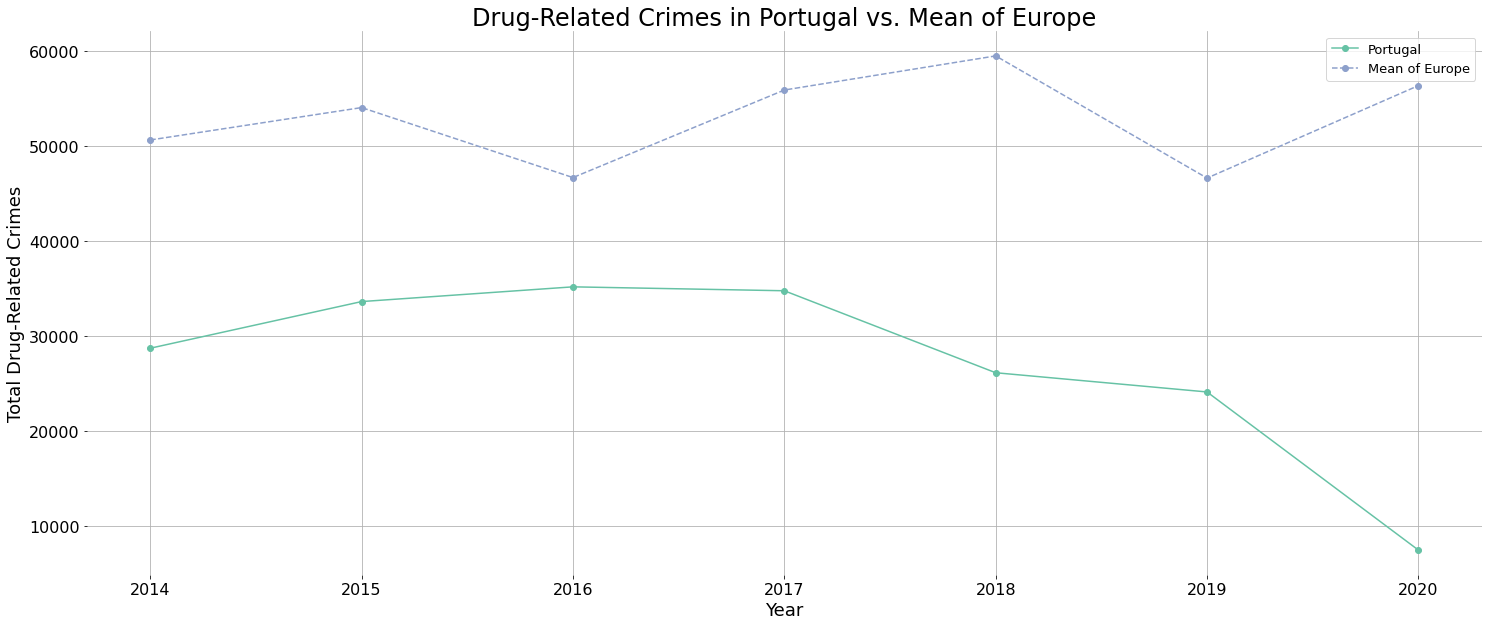

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("9_Misdaden.csv")

# Filter for Europe
europe_df = df[df['Region'] == 'Europe']

# Group by Country/Territory and Year, and sum the Total crimes
grouped_df = europe_df.groupby(['Country/Territory', 'Year']).agg({'Total': 'sum'}).reset_index()

# Filter for Portugal
portugal_df = grouped_df[grouped_df['Country/Territory'] == 'Portugal']

# Calculate the mean for Europe (excluding Portugal)
europe_mean_df = grouped_df[grouped_df['Country/Territory'] != 'Portugal'].groupby('Year').agg({'Total': 'mean'}).reset_index()
europe_mean_df.rename(columns={'Total': 'Mean of Europe'}, inplace=True)

# Merge Portugal data with Europe mean data
merged_df = pd.merge(portugal_df, europe_mean_df, on='Year', how='left')

# Plotting
fig, ax = plt.subplots(figsize=(25, 10))


# Remove axes spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)  # Hide all spines (borders)


ax.plot(merged_df['Year'].values, merged_df['Total'].values, label='Portugal', marker='o', color='#66c2a5')  # Pastel green
ax.plot(merged_df['Year'].values, merged_df['Mean of Europe'].values, label='Mean of Europe', marker='o', linestyle='--', color='#8da0cb')  # Pastel blue

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Drug-Related Crimes', fontsize=18)
ax.set_title('Drug-Related Crimes in Portugal vs. Mean of Europe', fontsize=24)

# Customize tick parameters
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


# Set the legend
ax.legend(fontsize=13)

# Enable the grid
ax.grid(True)

# Show the plot
plt.show()

*Figure 2: Drug-Related crimes in Portugal vs. Mean of Europe, from 2014 until 2020*
<br>
*Data: United Nations Office on Drugs and Crime, World Drug Report 2022*

### Decriminalization alleviates the burden on the criminal justice system and redirects resources to public health.
Another argument for the decriminalization of drugs is that decriminalization alleviates the burden on the criminal justice system and redirects resources to public health. To understand how decriminalization impacts the criminal justice system, we used data from the Council of Europe SPACE project (Annual Reports 2001-2023) to visualize the percentage of prisoners convicted of drug-related crimes per year. This variable is crucial as the existing drug legislation could have a direct impact on this variable and the criminal justice system. 

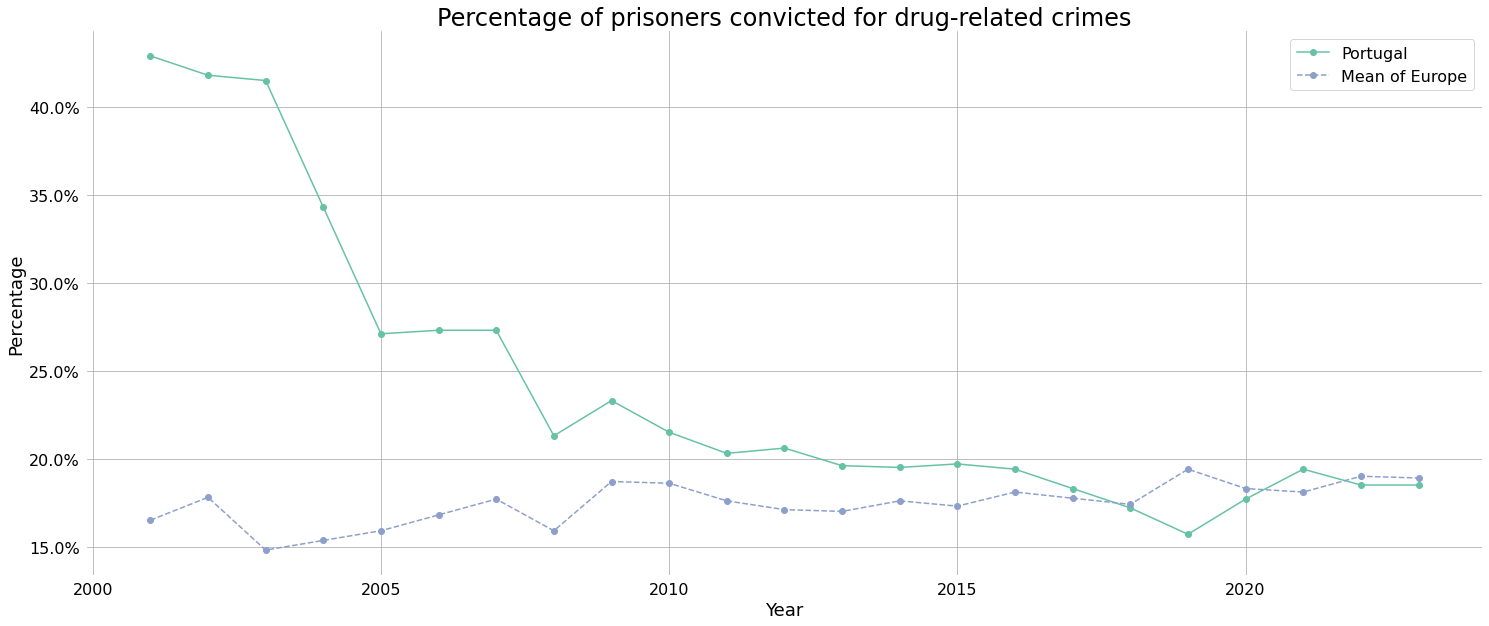

In [60]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

# Read the CSV file
drug_offences_df = pd.read_csv('drug_offences.csv')

# Interpolate missing values
drug_offences_df = drug_offences_df.interpolate()

# Plotting
plt.figure(figsize=(25, 10))
plt.plot(drug_offences_df['Year'].values, drug_offences_df['Percentage of prisoners sentenced for drug offences in Portugal'].values, label='Portugal', marker='o', color='#66c2a5')  # Pastel green
plt.plot(drug_offences_df['Year'].values, drug_offences_df['Mean Europe'].values, label='Mean of Europe', marker='o', linestyle='--', color='#8da0cb')  # Pastel blue


# Customize title and axis labels
plt.title('Percentage of prisoners convicted for drug-related crimes', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Percentage', fontsize=18)

# Customize tick parameters
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(fontsize=16)

# Remove axis lines (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Hide ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Show the plot
plt.grid(True)
plt.show()

*Figure 3: Percentage of prisoners convicted for drug-related crimes in Portugal vs. Mean of Europe, from 2001 until 2023*
<br>
*Data: Council of Europe SPACE project, Annual Reports 2001-2023*


In 2001, the year the new drug decriminalization legislation came into effect, more than 40% of the Portuguese prisoners were incarcerated for drug-related crimes, which is considerably above the European mean. The data visualization shows that whilst the European mean has gradually risen from 17 to 19% over the years, there is a substantial decline in the percentage of prisoners convicted of drug-related crimes in Portugal after decriminalization in 2001. ‘In the 1990s, drug-related offenses accounted for a significant portion of the prison population. After 2001, these figures dropped sharply, illustrating that decriminalization effectively reduces the burden on the criminal justice system, allowing resources to be reallocated towards public health initiatives and support services for individuals with substance use disorders.

## Second Perspective - Drugs should not be decriminalized because of the potential for increased addiction and health issues
### Increased deathrates 

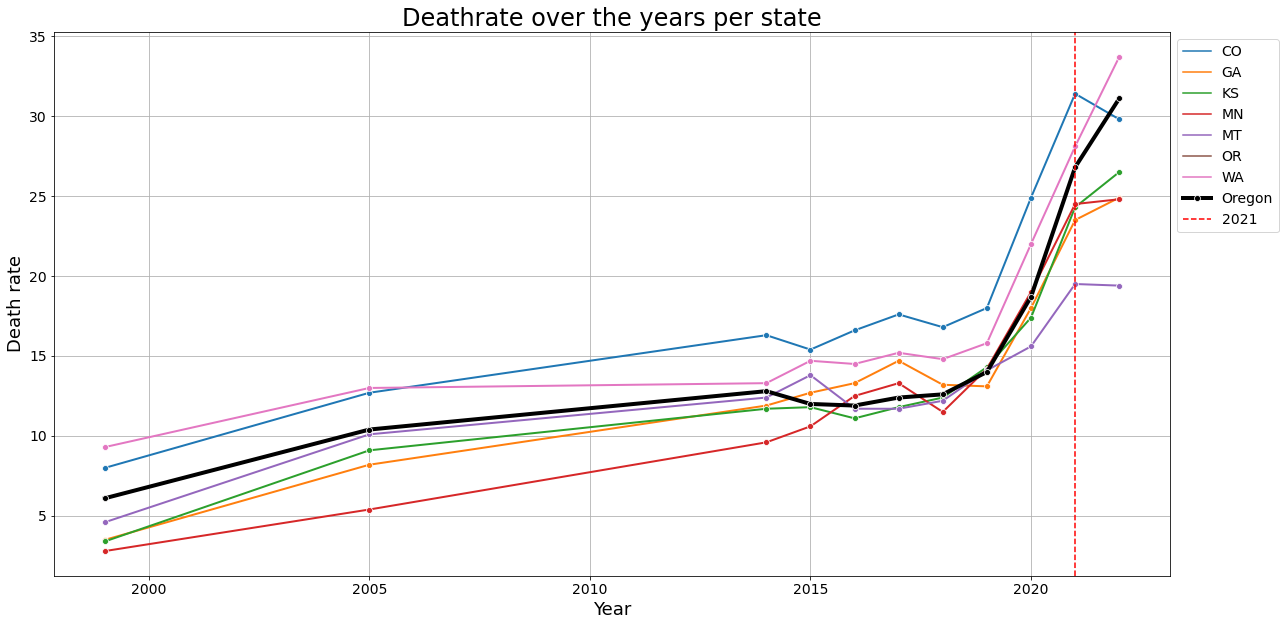

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
statesdata = pd.read_csv("statesdata.csv")
statesdata = statesdata[["YEAR", "STATE", "RATE"]]

# Filter the data for the desired states
desired_states = ['OR', 'CO', 'GA', 'KS', 'MN', 'MT', 'WA']
statesdata = statesdata[statesdata['STATE'].isin(desired_states)]

# Set the figure size to make the plot larger
plt.figure(figsize=(20, 10))

# Plot all states
sns.lineplot(data=statesdata, x='YEAR', y='RATE', hue='STATE', palette='tab10', marker='o', linewidth=2)

# Highlight Oregon with a distinct color and larger line width
sns.lineplot(data=statesdata[statesdata['STATE'] == 'OR'], x='YEAR', y='RATE', color='black', marker='o', linewidth=4, label='Oregon')

# Add a vertical line for the year 2021
plt.axvline(x=2021, color='red', linestyle='--', label='2021')

# Customize the title and axis labels
plt.title('Deathrate over the years per state', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Death rate', fontsize=18)

# Customize the tick parameters
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize the legend
plt.legend(fontsize=14, bbox_to_anchor=(1, 1))

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


*Figure 4: Deathrate of drug overdose mortality for the states Colorado, Georgia, Kansas, Minnesota, Montana, Oregon and Washington*
<br>
*Data: MOET NOG!!! Linde, welke data was dit?*

In [19]:
import pandas as pd
from pandas import *
import plotly.graph_objs as go

df = pd.read_csv("statesdata.csv")
df.columns = df.columns.str.strip()

# Check for 'YEAR' column
if 'YEAR' not in df.columns:
    raise KeyError("The 'YEAR' column is missing or misspelled in the DataFrame.")

# Calculate min and max values for RATE to set fixed color scale
min_rate = df['RATE'].min()
max_rate = df['RATE'].max()

# Sort years to ensure the slider goes from earliest to latest year
years = sorted(df['YEAR'].unique())

# Initialize the figure
fig = go.Figure()

# Create a choropleth map for each year and add it to the figure
for year in years:
    filtered_df = df[df['YEAR'] == year]
    fig.add_trace(
        go.Choropleth(
            locations=filtered_df['STATE'],
            z=filtered_df['RATE'],
            locationmode='USA-states',
            colorscale='Turbo',
            zmin=min_rate,
            zmax=max_rate,
            hovertext=filtered_df['STATE'],
            hoverinfo='location+z+text',
            visible=False,
            name=str(year)
        )
    )

# Make the first trace visible
fig.data[0].visible = True

# Create sliders
steps = []
for i, year in enumerate(years):
    step = dict(
        method='update',
        args=[{'visible': [j == i for j in range(len(fig.data))]},
              {'title': f'US Data for {year} - Death Rate'}],
        label=str(year)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    x=0.02,  # Move the slider more to the left
    xanchor='left',
    y=0,
    yanchor='top',
    pad=dict(t=50)
)]

# Add the sliders to the figure
fig.update_layout(
    title_text=f'US Data for {years[0]} - Death Rate',
    geo=dict(
        scope='usa',
        lakecolor='rgb(255, 255, 255)',
        projection=dict(type='albers usa'),
        showlakes=True,
        subunitcolor="rgb(255, 255, 255)",
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    sliders=sliders,
    height=800,  # Adjust the height as needed
)

# Show the interactive map
fig.show()

*Figure 5: Deathrate of drug overdose mortality in all States in different years (interactive)*
<br>
*Data: MOET NOG!!! Linde, welke data was dit?*

In [40]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("15_deaths-due-to-illicit-drug-use-by-age.csv")

# Filter data for a specific country (e.g., Portugal)
selected_country = 'Portugal'
country_df = df[df['Entity'] == selected_country].copy()

# Calculate cumulative deaths for stacking
country_df['Cumulative 15-49 years'] = country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 15-49 years']
country_df['Cumulative 50-69 years'] = country_df['Cumulative 15-49 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 50-69 years']
country_df['Cumulative 70+ years'] = country_df['Cumulative 50-69 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 70+ years']

# Initialize the figure
fig = go.Figure()

# Add traces for each age group, using cumulative values for stacking
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'], fill='tozeroy', name='5-14 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 15-49 years'], fill='tonexty', name='15-49 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 50-69 years'], fill='tonexty', name='50-69 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 70+ years'], fill='tonexty', name='70+ years'))

# Update plot layout
fig.update_layout(title=f'Drug-Related Deaths in {selected_country} by Age Group', xaxis_title='Year', yaxis_title='Cumulative Deaths', legend_title='Age Group')

# Show the interactive plot within the Jupyter Notebook
fig.show()

*Figure 6: Estimated annual number of drug use-related deaths, categorized by age*
<br>
*Data: IHME, Global Burden of Disease (2019)*

In [42]:
# ! pip3 install dash
# ! pip install dash

# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.graph_objects as go
# import pandas as pd
# import numpy as np

# years = ['2021','2020','2019','2018','2017','2016','2015','2014','2013']
# # Laad de dataset
# treatment_df = pd.read_csv("Treatment.csv")
# inhabitants = pd.read_csv("Population_europe.csv")
# inhabitants_df = inhabitants[['Country Name'] + years].copy()
# inhabitants_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# # Functie om het aantal per 1000 inwoners te berekenen
# def calc_per_100_inhabitants(row, year):
#     if pd.isna(row[year]):
#         return np.nan
#     else:
#         return round(row[year] / (inhabitants_df.at[row.name, year] / 1000), 3)

# # Maak een echte kopie van het treatment_df voor berekeningen per 1000 inwoners
# per_inhabitants_df = treatment_df.copy()

# # Bereken het aantal per 1000 inwoners voor elk jaar
# for year in years:
#     if year in treatment_df.columns and year in inhabitants_df.columns:
#         per_inhabitants_df[year] = treatment_df.apply(lambda row: calc_per_100_inhabitants(row, year), axis=1)

# per_inhabitants_df.reset_index(drop=True, inplace=True)

# app2 = dash.Dash(__name__)

# app2.layout = html.Div([
#     html.H1("Een hele mooie titel, die ga ik nog bedenken..."),

#     html.Label("Select countries (Portugal is always included):"),
#     dcc.Dropdown(
#         id='country-selector',
#         options=[{'label': i, 'value': i} for i in treatment_df['Country'].unique() if i != 'Portugal'],
#         value=['France', 'Spain'], 
#         multi=True
#     ),
#     html.Label("Select Scale:"),
#     dcc.Dropdown(
#         id='scale-selector',
#         options=[
#             {'label': 'Linear', 'value': 'linear'},
#             {'label': 'Logarithmic', 'value': 'log'}
#         ],
#         value='linear', 
#     ),
#     html.Label("Select Unit:"),
#     dcc.Dropdown(
#         id='data-selector',
#         options=[
#             {'label': 'Total amount of cases', 'value': 'total'},
#             {'label': 'Cases/1000 inhabitants', 'value': 'per_inhabitants'}
#         ],
#         value='total', 
#     ),
#     dcc.Graph(id='line-chart'),
#     html.Div(id='missing-data-warning', style={'color': 'red', 'margin-top': '20px'})
# ], style={'backgroundColor': 'lightgrey', 'padding': '20px'})

# @app2.callback(
#     Output('line-chart', 'figure'),
#     [Input('country-selector', 'value'),
#      Input('scale-selector', 'value'),
#      Input('data-selector', 'value')]
# )
# def update_chart(selected_countries, selected_scale, selected_data):
#     selected_countries.append('Portugal')  # Zorg ervoor dat Portugal altijd wordt toegevoegd

#     # Kies de juiste dataset op basis van het geselecteerde data type
#     filtered_df = per_inhabitants_df if selected_data == 'per_inhabitants' else treatment_df

#     # Filter de dataframe op basis van de geselecteerde landen
#     selected_countries_df = filtered_df[filtered_df['Country'].isin(selected_countries)].copy()
#     final_df = selected_countries_df.melt(id_vars=['Country'], value_vars=years, var_name='Year', value_name='Cases')

#     country_order = ['Portugal'] + sorted([c for c in selected_countries if c != 'Portugal'])
    
#     # Maak de figuur
#     fig = go.Figure()

#     for country in country_order:
#         country_data = final_df[final_df['Country'] == country]
#         fig.add_trace(go.Scatter(
#             x=country_data['Year'],
#             y=country_data['Cases'],
#             mode='lines+markers',
#             name=country
#         ))

#     fig.update_layout(
#         title="Drug treatment demand",
#         xaxis_title="Year",
#         yaxis_title="Number of Cases" if selected_data == 'total' else "Cases per 1000 Inhabitants",
#         yaxis_type=selected_scale
#     )

#     return fig

# if __name__ == '__main__':
#     app2.run_server(debug=True, port=8055)

# ! pip install plotly pandas ipywidgets
# ! pip3 install plotly pandas ipywidgets

# import pandas as pd
# import plotly.graph_objects as go
# import ipywidgets as widgets
# from IPython.display import display

# # Load datasets
# treatment_df = pd.read_csv("Treatment.csv")
# inhabitants = pd.read_csv("Population_europe.csv")

# # Select relevant years for inhabitants dataset
# years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
# inhabitants_df = inhabitants[['Country Name'] + years].copy()
# inhabitants_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# # Function to calculate cases per 1000 inhabitants
# def calc_per_1000_inhabitants(row, year):
#     country_population = inhabitants_df.loc[inhabitants_df['Country'] == row['Country'], year].values
#     if len(country_population) == 0 or pd.isna(country_population[0]):
#         return None
#     else:
#         return round(row[year] / (country_population[0] / 1000), 3)

# # Apply the function to treatment_df
# per_inhabitants_df = treatment_df.copy()
# for year in years:
#     per_inhabitants_df[year] = per_inhabitants_df.apply(lambda row: calc_per_1000_inhabitants(row, year), axis=1)

# # Dropdown widgets for country selection, scale selection, and data selection
# country_options = ['Portugal'] + treatment_df['Country'].unique().tolist()
# country_dropdown = widgets.Dropdown(
#     options=country_options,
#     value='Portugal',  # Default value changed to 'Portugal'
#     description='Select countries:',
#     disabled=False,
#     continuous_update=False,
# )

# scale_dropdown = widgets.Dropdown(
#     options=['linear', 'log'],
#     value='linear',
#     description='Select Scale:',
#     disabled=False,
# )

# data_dropdown = widgets.Dropdown(
#     options=['total', 'per_inhabitants'],
#     value='total',
#     description='Select Unit:',
#     disabled=False,
# )

# # Create initial empty figure
# fig = go.Figure()

# # Update function to handle widget changes
# def update_plot(selected_countries, selected_scale, selected_data):
#     fig.update_layout(
#         title=f"Drug treatment demand ({selected_data})",
#         xaxis_title="Year",
#         yaxis_title="Number of Cases" if selected_data == 'total' else "Cases per 1000 Inhabitants",
#         yaxis_type=selected_scale,
#     )
    
#     fig.data = []  # Clear existing traces
    
#     if isinstance(selected_countries, str):
#         selected_countries = [selected_countries]
#     selected_countries.append('Portugal')
#     filtered_df = per_inhabitants_df if selected_data == 'per_inhabitants' else treatment_df

#     for country in selected_countries:
#         country_data = filtered_df[filtered_df['Country'] == country].melt(id_vars=['Country'], value_vars=years, var_name='Year', value_name='Cases')
#         fig.add_trace(go.Bar(
#             x=country_data['Year'],
#             y=country_data['Cases'],
#             name=country
#         ))

# # Register update function with widgets
# widgets.interactive(update_plot, selected_countries=country_dropdown, selected_scale=scale_dropdown, selected_data=data_dropdown)

# # Display the initial plot
# display(fig)

# # Extra display of the widgets for interaction
# display(widgets.VBox([country_dropdown, scale_dropdown, data_dropdown]))



In [43]:
# import pandas as pd
# import plotly.graph_objects as go

# # Load the dataset
# df = pd.read_csv("15_deaths-due-to-illicit-drug-use-by-age.csv")

# # Function to update the plot based on the selected country
# def create_country_plot(selected_country):
#     country_df = df[df['Entity'] == selected_country].copy()
    
#     # Calculate cumulative deaths for stacking
#     country_df.loc[:, 'Cumulative 15-49 years'] = country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 15-49 years']
#     country_df.loc[:, 'Cumulative 50-69 years'] = country_df['Cumulative 15-49 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 50-69 years']
#     country_df.loc[:, 'Cumulative 70+ years'] = country_df['Cumulative 50-69 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 70+ years']
    
#     fig = go.Figure()
    
#     # Add traces for each age group, using cumulative values for stacking
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'], fill='tozeroy', name='5-14 years'))
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 15-49 years'], fill='tonexty', name='15-49 years'))
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 50-69 years'], fill='tonexty', name='50-69 years'))
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 70+ years'], fill='tonexty', name='70+ years'))
    
#     # Update plot layout
#     fig.update_layout(title=f'Drug-Related Deaths in {selected_country} by Age Group', xaxis_title='Year', yaxis_title='Cumulative Deaths', legend_title='Age Group')
    
#     fig.show()

# create_country_plot('Portugal')

###



## References